# 1. ETL and analysis for e-commerce big data

##### Jeff Guo; Aug 18, 2016; guojianfu@gmail.com

## 1.2 Outliers, data normalization and feature engineering

After we detect missing data, we first delete the entries that have too many missing data in differet dimentions. In the dog data, we will delete the entry with 22 NaNs.

Before we try to detect outliers, we need description of each data dimention and the relations between different data dimentions.

For categorical variables, we can use frequency table, bar chart (or stacked column bar chart), pie chart or bubble plot for the description of each data dimention. For continuous variables, we can use scatter plot, histogram, violin plot, box plot or violin plot with jittered data values for the description of each data dimention.

For categorical vs. categorical, we can use bubble plot, chi-square test and fisher's exact test. For categorical vs. continuous, we can use boxplot, violin plot, t-test, z-test and one-way ANOVA. For continus vs. continuous, we can use scatter plot and linear correlation analysis.

We can also visualize the high-dimentional data with PCA and correspoding labels.

We often do get the description of each data dimention. After that, we will use box plot to detect outliers for continuous variables. Q1 is the first quartile and Q3 is the third quartile. Any value, which is beyond the range of Q1-1.5 x IQR to Q3+1.5 x IQR, will be regarded an outlier. IQR is interquartile range. 

Another criteria is: data points, three or more standard deviation away from mean are considered outlier. Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding.

For continuous variables, if it is not normal distributuion and has skewed distributions, or if there are many outliers, we will try log (natural log or log10) scale transformation or square root scale transformation. We can try log10(x), sqrt(x), or log10(x+1), sqrt(x+1), after we do this data transform, previous outliers may be proven not at all (we can draw boxplot again with the transformed data). In this case, instead of using x, we will use log10(x) in subsequent modeling process.

The process to get the relations between different data dimentions and PCA can also be used to detect outliers. But usually we do not conduct this process at the beginning of the analysis, because the combination number will be large. For examle, if there are 30 dimentions, the number of relations between different data dimentions will be 30*29/2=435.

After we detect and remove outliers, sometimes we will do data normalization. Continuous data normalization includes mean centering and feature scaling. Feature scaling has two ways, one way is to be divided by the range of the data, and another way is to be divided by standard deviation of the data. For categorical data normalization, the simplest way is to make the categorical value 0 and 1. If we make it ordered categorical values, we will also do the mean centering and feature scaling process.

Sometimes we don't conduct data normalization until we begin the process of data analysis.

For a single feature analysis, data normalization is usually not necessary.

For hypothesis test, no matter univariate hypothesis test, multiple hypothesis test or multivariate hypothesis test, we don't need data normalization. However, if we do the data normalization based on each dimension, hypothesis test result will not be affected either. Especially, for the mutltivariate hypothesis testing, the shape of the data in high-dimentional space may look like an elliptical plate, but the projection to two orthometric axises may be both lines with the length of 1. Although the data normalization based on each dimension influences the covariances of different dimensions, the correlation coefficients of different dimensions will not be affected.

For supervised mathematical modeling, such as linear regression, logistic regression, mixed effects logistic regression (linear mixed model) and artifical neural network, data normalization based on each dimension is necessary. After data normalization, gradient desent for objective optimization will be much faster.

For unsupervised mathematical modeling, such as PCA, data normalization is also necessary. Data normalization based on each dimension influences the covariances of different columns of the dataframe, but it does not affect the correlation coefficients of different columns of the dataframe. PCA works on the correlation coefficient matrix not the coveriance matrix essentially. K-means clustering does not require data normalization.

### A note:

PCA process is also line fitting, it is similar to linear correlation analysis, but it is different from linear regression. For objective function in linear regression, it tries to minimize the difference in y axis between the predicted value and the real value over the real value in y axis. For objective function in PCA process and linear correlation analysis, it tries to minimize the distance from the real data point to the fitted line over the distance between the real data point and the original point.

Rank transform (sort the values and their ranks will be their rank transforms) can transform continuous data to categorical data. Other methods include binning transform (values in a range will be considered the same categorical data), K-means clustering, etc.

Binning ransform and rank transform are both ordered categorical data (not simple string data). For ordered categorical data, they can be represented by one node in logistic regression or neural network (Just like continuous data). Of course, ordered categorical data can be further transformed to unordered categorical data, if so, they should be represented by a two-layer (or mutiple layer) subnetwork in logictic regression or neural  network. The first layer are all encoded as 0 or 1, the number of categories equals to the number of nodes in the first layer. The second layer contains only one node.

Decision tree is also a kind of supervised mathematical modeling. Logistic regression is a two-layer neural network. For neural network, the predict variables can either be continuous variables or categorical variables, and the response variables can only be unordered catecorical variables. For decision tree, the predict variables can only be categorical variables (there may be range or inequalities for continuous variables, it is indeed ordered categorical variables), and the response variables can only be unordered categorical variables.

### Let's continue:

After outlier detection and data normalization, sometimes, we will conduct the process of feature engineering. Here the feature engineering refers to creating a new feature from two or more old features.

PCA is actually a process of feature engineering. The first principal component and the second principal component are both the linear combinations of old features. 

For multivariate hypothesis test and anomaly detection, you can either compute the covariance matrix and get the probability density (or probability that is as extreme as the value), or you can do multiple univariate hypothesis test with new features created.

In [1]:
import pandas as pd
xl = pd.ExcelFile("dognition_data_aggregated_by_dogid.xlsx")
df = xl.parse("dog_id_max_ranks")

In [2]:
import numpy as np
df.head()
df['Dog ID']
s = df.ix[:,0]
type(s)
s
s1 = df.ix[0,:]
s1
df.columns
df.index
df.columns.dtype
s = pd.Series(["a","b","c","a"])
print s
s2 = s.astype('category')
print s2
s2p = s.astype('category', ordered=True)
print s2p
s2pp = s.astype('category', categories=['c','b','a'], ordered=True)
print s2pp
s2ppp = s.astype('category', categories=['c','b'], ordered=True)
print s2ppp
s3 = s2.astype('string')
print s3
s4 = np.asarray(s2)
print s4
print type(s4)
print s4.dtype
print list('bab')
s2.cat.categories = ["Group %s" % g for g in s2.cat.categories]
print s2
# s2.cat.ordered = True
# print s2
s2.cat.remove_unused_categories()
print s2.cat.categories
print type(s2.cat.categories)
print s2.cat.categories.tolist()
# Series.tolist(), Index.tolist(), np.array(Dataframe).tolist()
# s2.cat.set_categories(["one","two","three","four"])
s22=s2.cat.as_ordered()
print s22
print s22.cat.ordered
print s2.value_counts()
print type(s2.value_counts())
print set([pd.isnull(df.head())[y].dtype for y in pd.isnull(df.head()).columns])
print df.index.dtype
print df.index.dtype == np.int64

0    a
1    b
2    c
3    a
dtype: object
0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]
0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a < b < c]
0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [c < b < a]
0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (2, object): [c < b]
0    a
1    b
2    c
3    a
dtype: object
['a' 'b' 'c' 'a']
<type 'numpy.ndarray'>
object
['b', 'a', 'b']
0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): [Group a, Group b, Group c]
Index([u'Group a', u'Group b', u'Group c'], dtype='object')
<class 'pandas.indexes.base.Index'>
['Group a', 'Group b', 'Group c']
0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): [Group a < Group b < Group c]
True
Group a    2
Group c    1
Group b    1
dtype: int64
<class 'pandas.core.series.Series'>
set([dtype('bool')])
int64
True


In [3]:
df.dtypes
# object usually means string

Dog ID                                              object
Total Tests Completed                                int64
Mean ITI (days)                                    float64
Mean ITI (minutes)                                 float64
Median ITI (days)                                  float64
Median ITI (minutes)                               float64
Time diff between first and last game (days)       float64
Time diff between first and last game (minutes)    float64
User ID                                             object
Gender                                              object
Birthday                                           float64
Breed                                               object
Breed_Type                                          object
Breed_Group                                         object
Weight                                             float64
Dog_Fixed                                          float64
DNA_Tested                                         float

In [4]:
import numpy as np
num = np.sum(df.isnull().values, axis = 1).tolist()
# print len(num)

l1 = list(set(num))
l1.sort()

fre = {i:num.count(i) for i in l1}
# print fre
# print

dt = pd.DataFrame(fre.items(), columns=['Number of NaNs', 'Count'])
# or list(fre.items()) in python 3

print dt
print
print df.shape
print
print num.index(22)
print
db = df.drop(df.index[[num.index(22)]])
print df.shape
print
print db.shape

   Number of NaNs  Count
0               0  11145
1               1     46
2               2     19
3               3     89
4               4   5832
5               5      8
6               7      9
7               8    837
8              22      1

(17986, 30)

16643

(17986, 30)

(17985, 30)


In [5]:
print db['Dog ID'].dtype
db2 = db.copy()
# db['Dog ID'].tolist()
a = db2['Dog ID'].astype('category')
print db['Dog ID'].dtype
print db2['Dog ID'].dtype
b = a.value_counts()
# print b
# print b.shape
print b.shape[0]
c=(1)
print c
d=(1,)
print d

object
object
object
17985
1
(1,)


In [6]:
for y in db2.columns:
    if db2[y].dtype == object:
        db2[y] = db2[y].astype('category')    
#[pd.isnull(df.head())[y].dtype for y in pd.isnull(df.head()).columns]
print [db2[i].value_counts().shape[0] for i in db2.columns]
print db2.dtypes

[17985, 45, 14705, 14705, 5870, 5870, 14181, 14181, 16261, 2, 26, 1326, 4, 8, 20, 2, 2, 10, 80, 15, 15, 2, 3398, 290, 6113, 68, 38, 36, 12558, 7]
Dog ID                                             category
Total Tests Completed                                 int64
Mean ITI (days)                                     float64
Mean ITI (minutes)                                  float64
Median ITI (days)                                   float64
Median ITI (minutes)                                float64
Time diff between first and last game (days)        float64
Time diff between first and last game (minutes)     float64
User ID                                            category
Gender                                             category
Birthday                                            float64
Breed                                              category
Breed_Type                                         category
Breed_Group                                        category
Weight        

In [7]:
db['Dog ID'].dtype == object
db['Total Tests Completed'].dtype == object
print [i for i in db.columns if db[i].dtype == object]

[u'Dog ID', u'User ID', u'Gender', u'Breed', u'Breed_Type', u'Breed_Group', u'Dimension', u'City', u'State', u'Zip', u'Country', u'Exclude', u'Free_Start_User', u'Last_Active_At', u'Membership_Type']


In [8]:
for y in db.columns:   
    if db[y].dtype == object and db[y].value_counts().shape[0]<20:
        # in python, logical operators are and, or
        print y
        print db[y].value_counts()
        print 

Gender
male      9352
female    8633
Name: Gender, dtype: int64

Breed_Type
Pure Breed                          9346
Mixed Breed/ Other/ I Don't Know    4999
Cross Breed                         2976
Popular Hybrid                       664
Name: Breed_Type, dtype: int64

Breed_Group
0               9055
Sporting        2587
Herding         1876
Toy             1168
Non-Sporting    1007
Working          899
Terrier          809
Hound            584
Name: Breed_Group, dtype: int64

Dimension
0                  13776
socialite            871
charmer              690
protodog             602
renaissance-dog      510
ace                  477
stargazer            361
expert               298
maverick             271
einstein             129
Name: Dimension, dtype: int64

Membership_Type
1     9129
4     3874
2     3735
3      659
0      502
5       46
CA      40
Name: Membership_Type, dtype: int64



In [9]:
col_some = ['Exclude','Free_Start_User']

for x in col_some:
    print x
    print db[x].value_counts().shape[0]
    print db[x].value_counts()
    print

Exclude
38
0      17828
1        117
V0N        3
V6K        2
K2E        2
V6B        1
N1H        1
M6s        1
L7S        1
P1B        1
N0C        1
L3M        1
L4C        1
L4A        1
v0n        1
K8A        1
K0k        1
V0H        1
M5a        1
M5A        1
N1E        1
B3V        1
L9G        1
l4j        1
M6K        1
L5B        1
V8T        1
M4E        1
v8r        1
J0X        1
L1M        1
L1N        1
m1e        1
N6p        1
L6M        1
H3L        1
V6N        1
A1B        1
Name: Exclude, dtype: int64

Free_Start_User
36
0                                                                           13427
1                                                                            4518
North Island                                                                    4
Downtown Toronto (Regent Park / Port of Toronto)                                2
Vancouver (Central Kitsilano)                                                   2
Nepean East                          

In [10]:
col_other = ['User ID','Breed','City','State','Zip','Country','Last_Active_At']        

for x in col_other:
    print x
    print db[x].value_counts().shape[0]
    print 

User ID
16261

Breed
1326

City
3398

State
290

Zip
6113

Country
68

Last_Active_At
12558



In [11]:
%matplotlib inline
from ggplot import *

In [12]:
import matplotlib
matplotlib.__version__

'1.5.2'

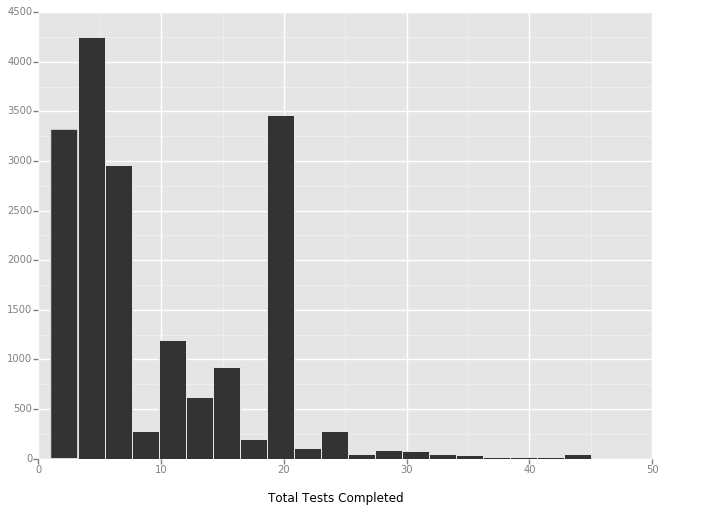

<ggplot: (289317829)>

In [13]:
# print db2['Total Tests Completed']
p = ggplot(db2, aes(x='Total Tests Completed'))
# p + geom_histogram()
# p + geom_histogram(binwidth=1)
p + geom_histogram(bins=20)

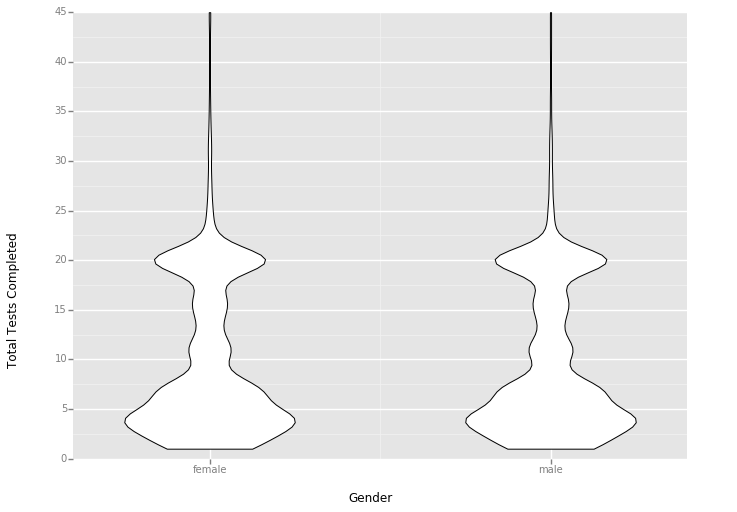

<ggplot: (289399953)>

In [14]:
# print db2['Gender'].dtype
p = ggplot(db2, aes(x='Gender',y='Total Tests Completed'))
# p + geom_violin(alpha = .75)
p + geom_violin()

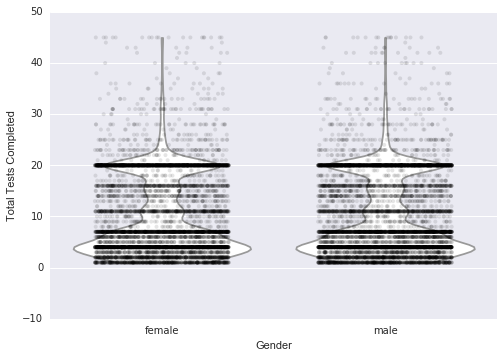

In [15]:
import seaborn as sns
# seaborn.__version__
# sns.violinplot(x=db2['Gender'], y=db2['Total Tests Completed'], inner=None, color="white", 
#                alpha=.75, cut=0)
sns.violinplot(x=db2['Gender'], y=db2['Total Tests Completed'], inner=None, color="white", 
               cut=0)
sns.stripplot(x=db2['Gender'], y=db2['Total Tests Completed'], jitter=.3,  color="black", 
              alpha=.1, size=4)

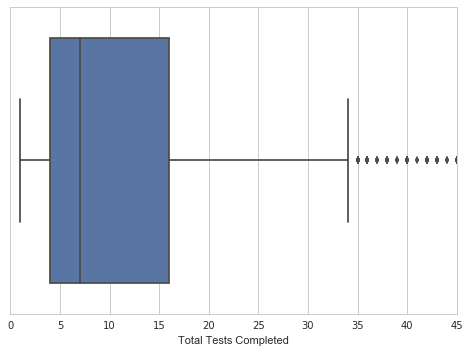

In [21]:
sns.set_style("whitegrid")
g=sns.boxplot(x=db2['Total Tests Completed'])

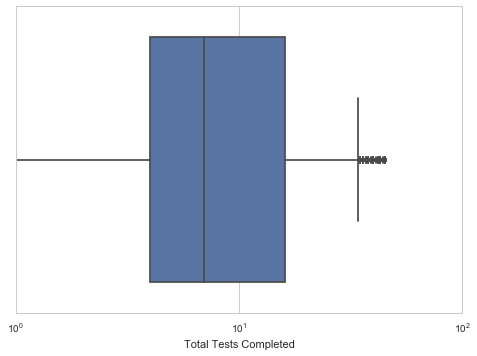

In [32]:
g=sns.boxplot(x=db2['Total Tests Completed'])
import matplotlib.pyplot as plt
# g.set(xlim=(0, 50))
g.set_xscale('log')
# g.set_yscale('log')
# plt.show()

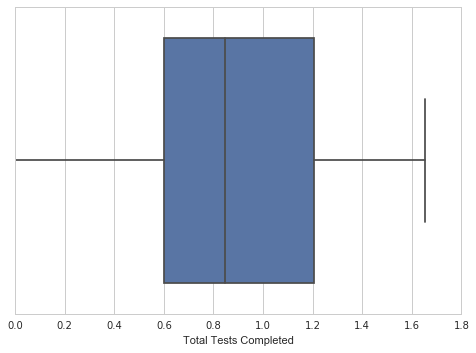

In [34]:
temp = np.log10(db2['Total Tests Completed'])
sns.boxplot(x=temp)

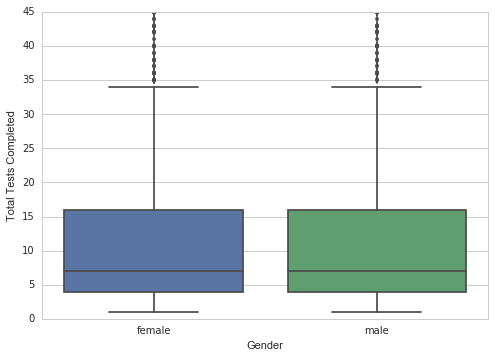

In [20]:
sns.boxplot(x="Gender", y="Total Tests Completed", data=db2)

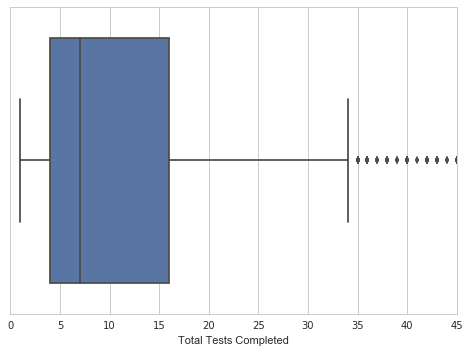

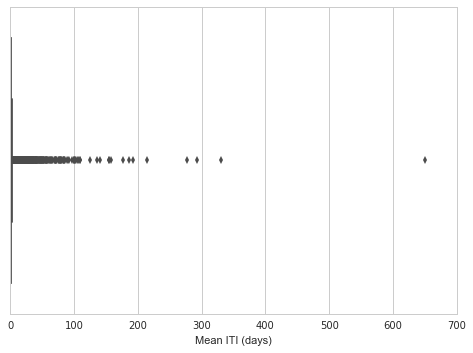

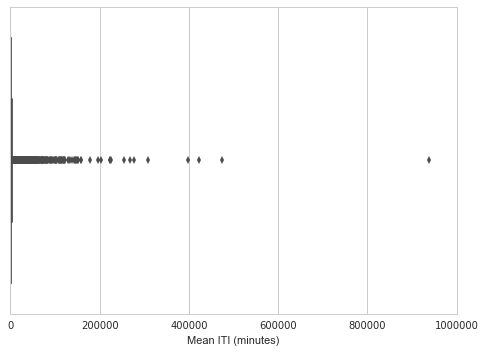

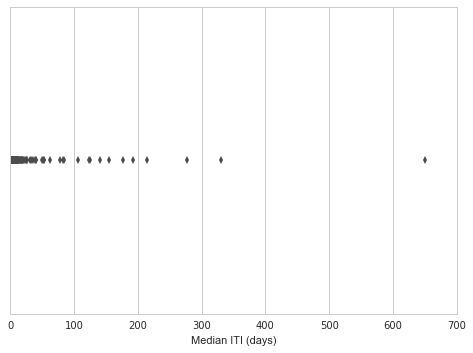

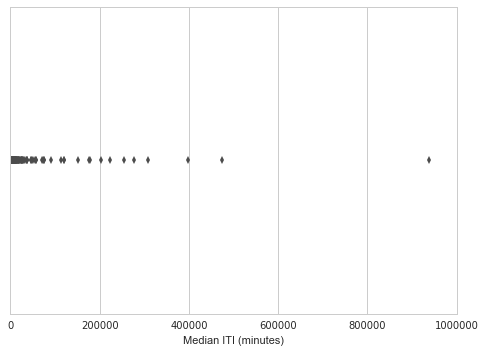

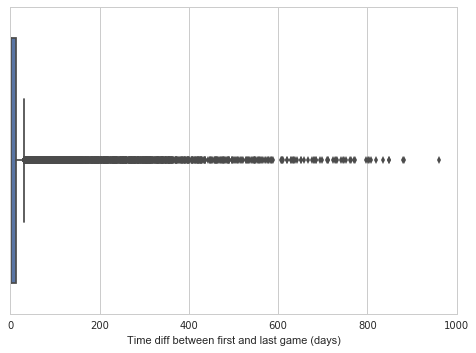

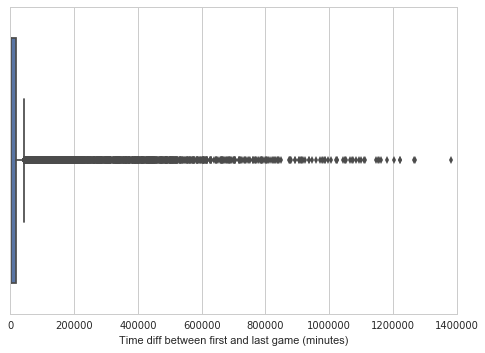

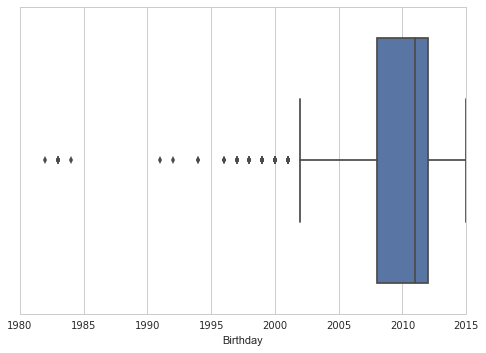

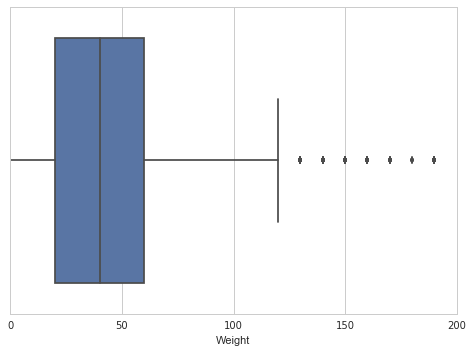

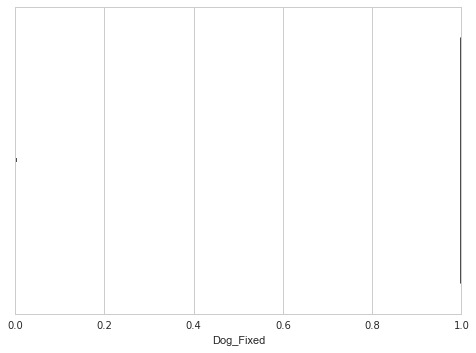

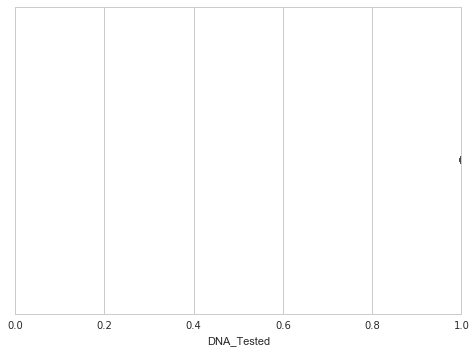

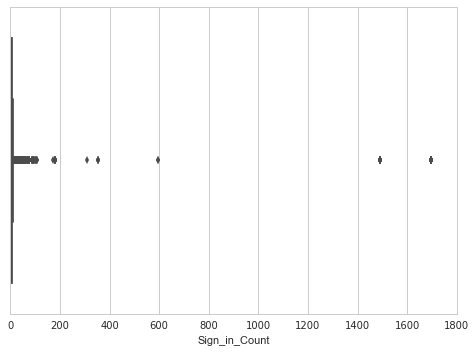

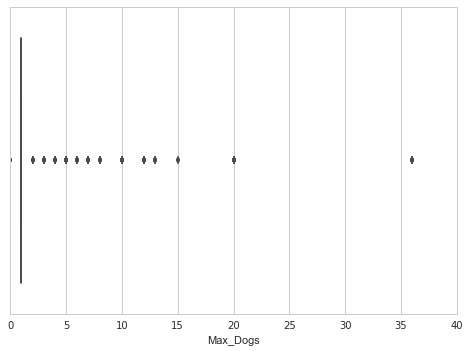

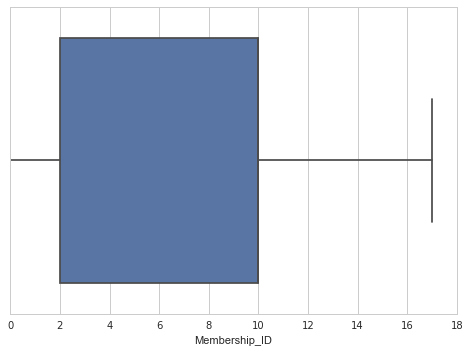

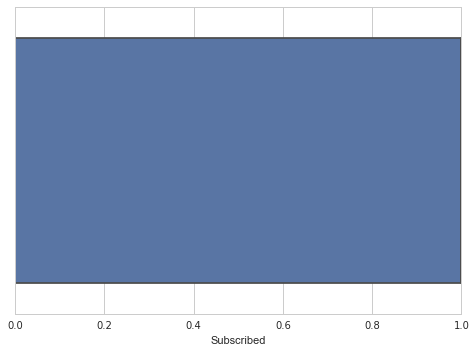

In [40]:
db2.dtypes
the_values = ['Total Tests Completed','Mean ITI (days)','Mean ITI (minutes)',\
              'Median ITI (days)','Median ITI (minutes)',\
              'Time diff between first and last game (days)',\
              'Time diff between first and last game (minutes)','Birthday','Weight',\
              'Dog_Fixed','DNA_Tested','Sign_in_Count','Max_Dogs','Membership_ID',\
              'Subscribed']
for i, j in enumerate(the_values):
    # print type(i)
    plt.figure(i)
    sns.boxplot(x=db2[j])

In [44]:
a1 = db2['Dog_Fixed'].astype('category')
a1.cat.categories
a1.value_counts()

1.0    15303
0.0     2682
Name: Dog_Fixed, dtype: int64

In [46]:
a1 = db2['DNA_Tested'].astype('category')
a1.cat.categories
a1.value_counts()

0.0    17325
1.0      660
Name: DNA_Tested, dtype: int64

In [47]:
a1 = db2['Subscribed'].astype('category')
a1.cat.categories
a1.value_counts()

1.0    9876
0.0    8109
Name: Subscribed, dtype: int64

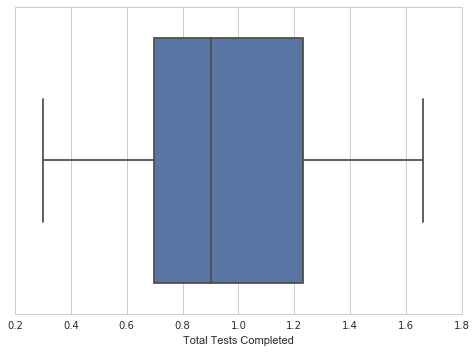

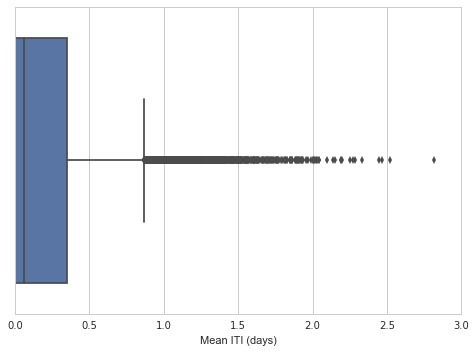

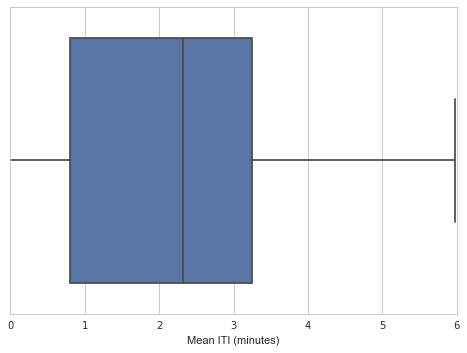

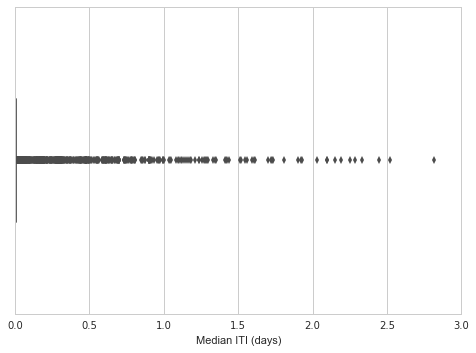

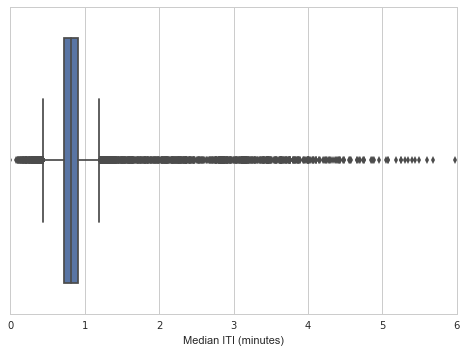

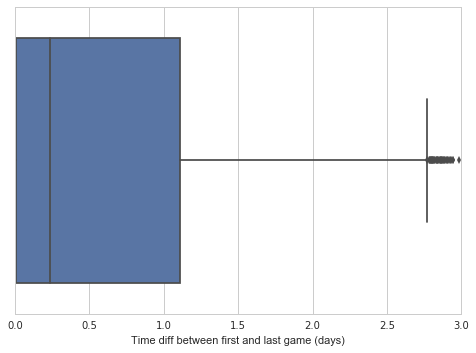

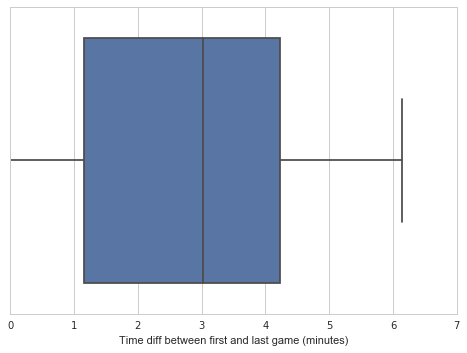

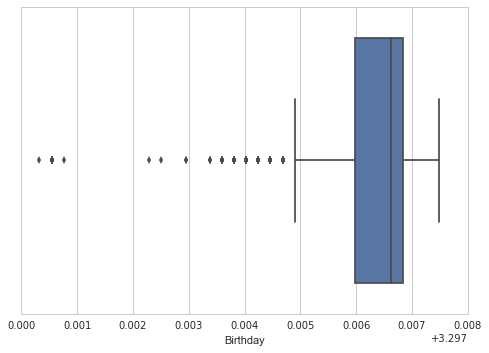

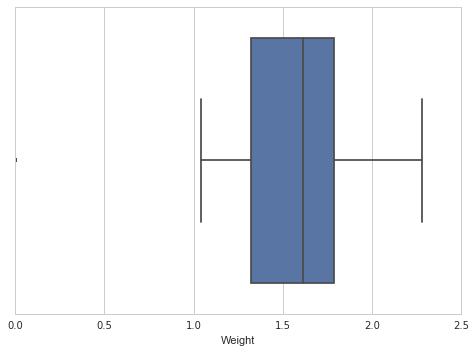

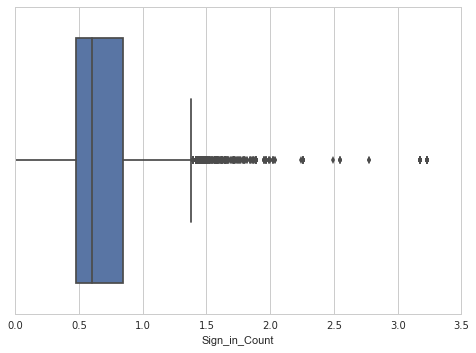

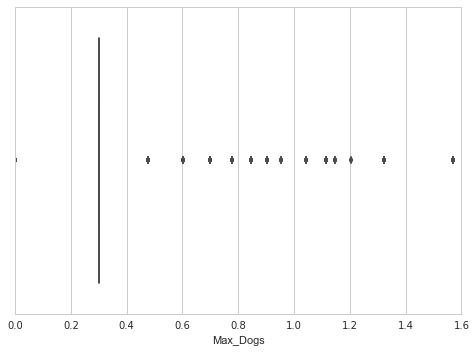

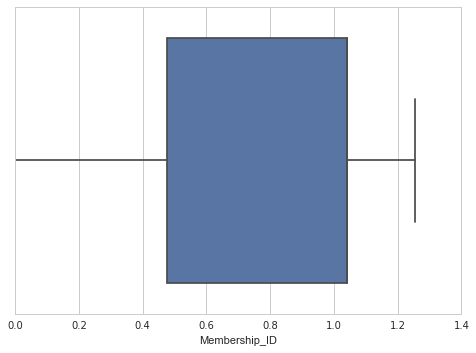

In [49]:
the_values2 = ['Total Tests Completed','Mean ITI (days)','Mean ITI (minutes)',\
              'Median ITI (days)','Median ITI (minutes)',\
              'Time diff between first and last game (days)',\
              'Time diff between first and last game (minutes)','Birthday','Weight',\
              'Sign_in_Count','Max_Dogs','Membership_ID']

for i, j in enumerate(the_values2):
    # print type(i)
    plt.figure(i)
    sns.boxplot(x=np.log10(db2[j]+1))

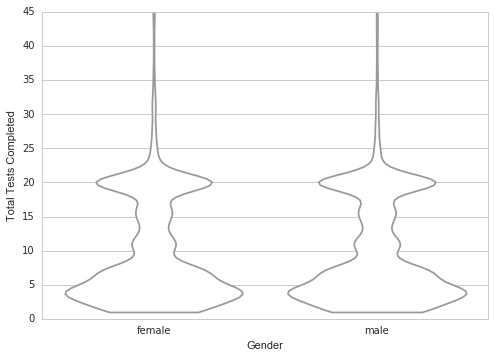

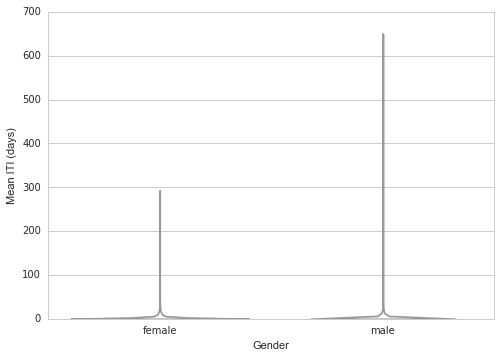

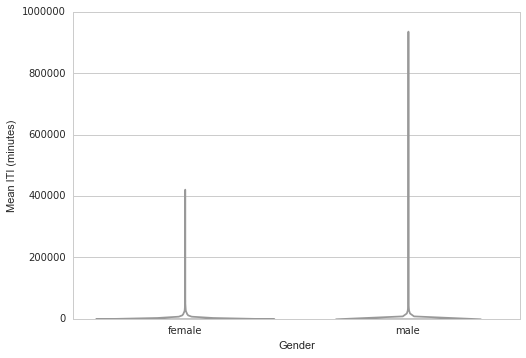

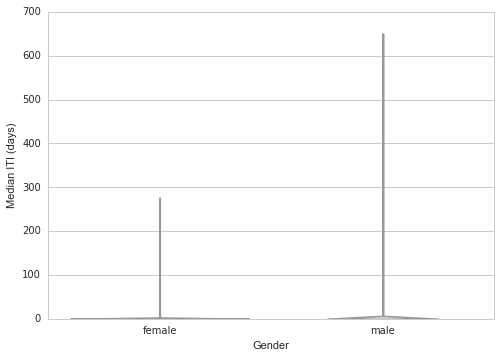

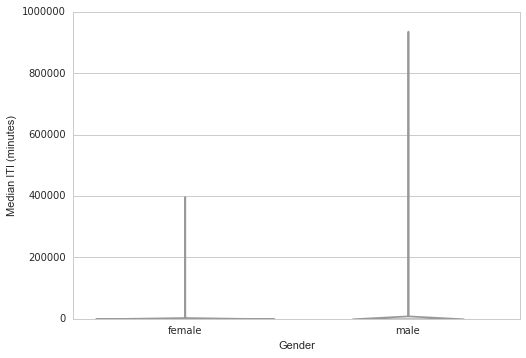

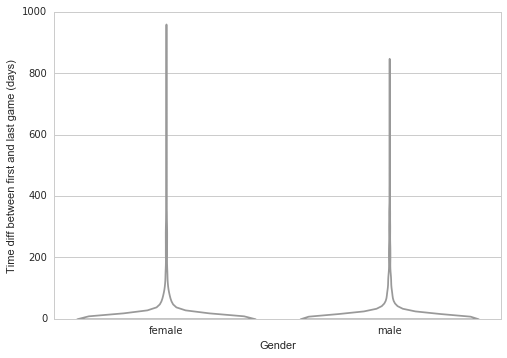

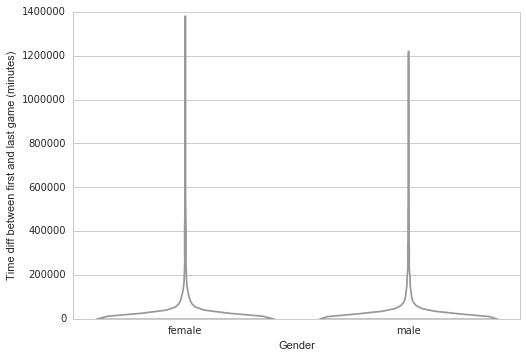

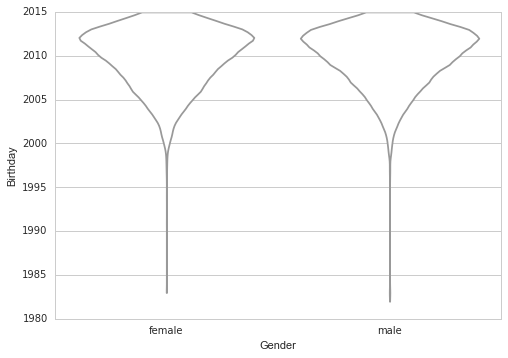

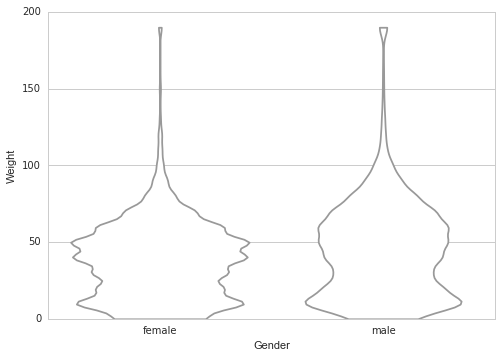

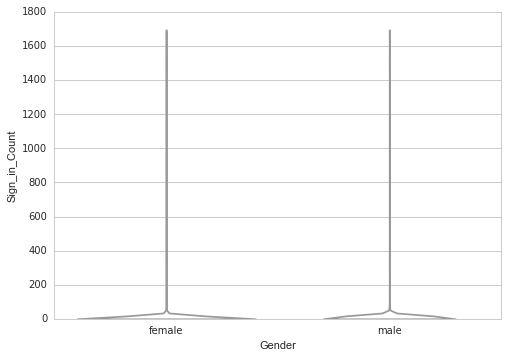

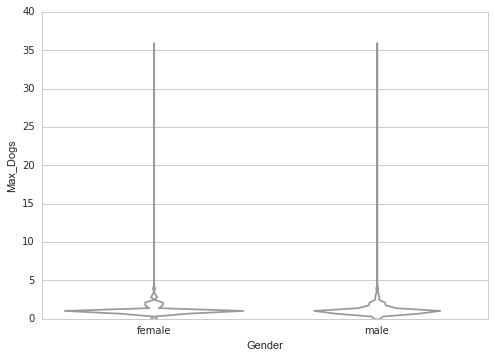

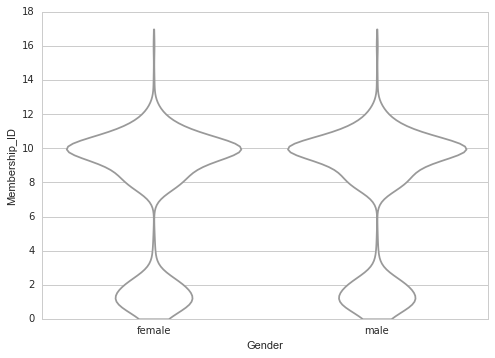

In [50]:
for i, j in enumerate(the_values2):
    plt.figure(i)
    sns.violinplot(x=db2['Gender'], y=db2[j], inner=None, color="white", cut=0)